<h1><center>Pattern Recognition using problem Solving CA1</center><h1>

<h2><center>Dataset Standard Scaling & Column Encoding</center><h2>
<h3>The dataset will be using label encoding for ordinal category data type and 
onehot encoding for nominal categpry data type. 
After which Standardscalar will be used to normalise the data including the 
numerical data type.<h3>

### Source 1 : https://www.open.edu/openlearncreate/mod/oucontent/view.php?id=79999&printable=1

### Source 2 : https://www.leaf.tv/articles/difference-between-well-water-spring-water/

### Source 3 : http://www.clean-water-for-laymen.com/water-source-quality.html


<h2><center>Dataset Column Encoding</center><h2>

In [2]:
#=========================================================================
# Import all necessary libraries
#=========================================================================

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

%matplotlib inline

#=========================================================================
# Read dataset using pandas and first 5 rows of data
#=========================================================================

X = pd.read_excel('Preprocessed_training_label_set_SL.xlsx')
X.isnull().sum()

latitude                     0
longitude                    0
broke_down_repair            0
owns_water_point             0
management_committee         0
Pump_Age                     0
extraction_type              0
waterpoint_type              0
water point functionality    0
dtype: int64

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22461 entries, 0 to 22460
Data columns (total 9 columns):
latitude                     22461 non-null float64
longitude                    22461 non-null float64
broke_down_repair            22461 non-null object
owns_water_point             22461 non-null object
management_committee         22461 non-null object
Pump_Age                     22461 non-null int64
extraction_type              22461 non-null object
waterpoint_type              22461 non-null object
water point functionality    22461 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 1.5+ MB


In [4]:
# Categories the different features groupings :

ordinal_features  = ['broke_down_repair','owns_water_point','management_committee']
numeric_features  = ['latitude','longitude','Pump_Age']
nominal_features  = ['extraction_type','waterpoint_type']
ordinal_label     = ['water point functionality']

In [5]:
# For Ordinal Label data

le = LabelEncoder()
for i in ordinal_features:
    X[i] = le.fit_transform(X[i].astype(str))
    print("\n" + i + " Label mapping:")
    for j, item in enumerate(le.classes_):
        print(item, '-->', j)

X[ordinal_label] = le.fit_transform(X[ordinal_label].astype(str))

X.head()


broke_down_repair Label mapping:
1:Water point has never broken down --> 0
2:Less than a week --> 1
3:Over a week --> 2
4:Over a month --> 3
5:More than a year --> 4
6:I don't know --> 5

owns_water_point Label mapping:
10:CBO --> 0
1:Community --> 1
2:NGO --> 2
3:GUMA --> 3
4:SALWACO --> 4
5:School --> 5
6:Health Facility --> 6
7:Other Institution --> 7
8:Private Individual --> 8
9:Unknown --> 9

management_committee Label mapping:
1:Yes --> 0
2:No --> 1
3:Unknown --> 2


C:\Users\Wilson\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,latitude,longitude,broke_down_repair,owns_water_point,management_committee,Pump_Age,extraction_type,waterpoint_type,water point functionality
0,7.523658,-12.500999,0,1,2,4,1:Hand pump,3:Tube well or borehole,0
1,7.253449,-11.895057,4,1,0,9,1:Hand pump,9:Unprotected dug well,3
2,7.958622,-11.754123,0,8,1,9,"7:Hand manual (e.g. rope pump, rope & bucket)",9:Unprotected dug well,0
3,7.515611,-12.232625,0,6,2,13,1:Hand pump,2:Protected dug well,0
4,7.865347,-11.193310,0,8,2,10,"7:Hand manual (e.g. rope pump, rope & bucket)",9:Unprotected dug well,0


In [6]:
# Print the mapping
print("\nLabel mapping:")
for i, item in enumerate(le.classes_):
    print(item, '-->', i)


Label mapping:
1:Yes – Functional (and in use) --> 0
2:Yes – Functional (but not in use) --> 1
3:Yes - But damaged --> 2
4:No - Broken down --> 3


In [7]:
 # For Norminal data

X = pd.get_dummies(X, columns=nominal_features)

X.head()

,latitude,longitude,broke_down_repair,owns_water_point,management_committee,Pump_Age,water point functionality,extraction_type_1:Hand pump,extraction_type_2:Submersible pump,extraction_type_3:Surface pump,extraction_type_4:Hydram pump,extraction_type_5:Gravity,"extraction_type_7:Hand manual (e.g. rope pump, rope & bucket)",extraction_type_OTHER,waterpoint_type_2:Protected dug well,waterpoint_type_3:Tube well or borehole,waterpoint_type_5:Sand/Sub-surface dam (with well or standpipe),waterpoint_type_6:Public tap/standpipe (stand-alone or water kiosk,waterpoint_type_9:Unprotected dug well,waterpoint_type_OTHER
0,7.523658,-12.500999,0,1,2,4,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,7.253449,-11.895057,4,1,0,9,3,1,0,0,0,0,0,0,0,0,0,0,1,0
2,7.958622,-11.754123,0,8,1,9,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,7.515611,-12.232625,0,6,2,13,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,7.865347,-11.193310,0,8,2,10,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [8]:
# Split dataset into Train, vaidation & test set

features = list(X)
y = X['water point functionality']
X = X.drop(['water point functionality'], axis=1)
corr_features = list(X)
y = pd.DataFrame(y)
y.columns = ['water point functionality']
y.head()

,water point functionality
0,0
1,3
2,0
3,0
4,0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [10]:
y_train.head()

,water point functionality
14117,3
10061,3
7517,0
9719,0
21532,0


<h3>Check for Co-relation<h3>

In [11]:
# correlation matrix (before stdze)
corr = X.corr()
print('Corelation Matrix:\n',X.corr())

Corelation Matrix:
                                                     latitude  longitude  \
latitude                                            1.000000  -0.210303   
longitude                                          -0.210303   1.000000   
broke_down_repair                                   0.074612   0.009588   
owns_water_point                                   -0.147984   0.023965   
management_committee                               -0.102420   0.022665   
Pump_Age                                           -0.020729   0.216624   
extraction_type_1:Hand pump                         0.134976  -0.073838   
extraction_type_2:Submersible pump                 -0.011458  -0.034056   
extraction_type_3:Surface pump                      0.015133  -0.053035   
extraction_type_4:Hydram pump                      -0.055033   0.070923   
extraction_type_5:Gravity                           0.041340   0.003571   
extraction_type_7:Hand manual (e.g. rope pump, ... -0.185887   0.120052   
extra

In [12]:
#*******************************************************************************
#                         Save Co-relation data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('X_Corr_SL.xlsx', engine='xlsxwriter')

corr.to_excel(writer, sheet_name='X_Corr', index = corr_features)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

<h2><center>Dataset Column Scaling</center><h2>

In [13]:
scaler = StandardScaler().fit(X_train)

X_train_col_names = X_train.columns
y_train_col_names = y_train.columns
X_val_col_names   = X_val.columns
y_val_col_names   = y_val.columns
X_test_col_names  = X_test.columns
y_test_col_names  = y_test.columns

X_train_scaled = scaler.transform(X_train)
X_val_scaled   = scaler.transform (X_val)
X_test_scaled  = scaler.transform (X_test)

X_train_scaled = pd.DataFrame(X_train_scaled)
X_val_scaled = pd.DataFrame(X_val_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)


In [14]:
X_train_scaled.columns = X_train_col_names
X_val_scaled.columns = X_train_col_names 
X_test_scaled.columns = X_train_col_names

X_val_scaled.head()


,latitude,longitude,broke_down_repair,owns_water_point,management_committee,Pump_Age,extraction_type_1:Hand pump,extraction_type_2:Submersible pump,extraction_type_3:Surface pump,extraction_type_4:Hydram pump,extraction_type_5:Gravity,"extraction_type_7:Hand manual (e.g. rope pump, rope & bucket)",extraction_type_OTHER,waterpoint_type_2:Protected dug well,waterpoint_type_3:Tube well or borehole,waterpoint_type_5:Sand/Sub-surface dam (with well or standpipe),waterpoint_type_6:Public tap/standpipe (stand-alone or water kiosk,waterpoint_type_9:Unprotected dug well,waterpoint_type_OTHER
0,0.753139,1.333992,-1.245061,-0.888534,0.471253,1.167456,0.952963,-0.135726,-0.060256,-0.168097,-0.397701,-0.605590,-0.149442,-1.070670,3.130399,-0.151136,-0.462069,-0.460627,0.0
1,-0.738590,0.938583,-0.684937,1.332702,0.471253,-0.122184,-1.049359,-0.135726,-0.060256,5.948939,-0.397701,-0.605590,-0.149442,-1.070670,-0.319448,-0.151136,2.164179,-0.460627,0.0
2,-0.619297,0.238721,0.435309,1.332702,2.069598,1.454043,-1.049359,-0.135726,-0.060256,-0.168097,-0.397701,1.651282,-0.149442,-1.070670,-0.319448,-0.151136,-0.462069,2.170953,0.0
3,0.756218,-1.105769,-0.684937,1.015382,0.471253,0.307696,0.952963,-0.135726,-0.060256,-0.168097,-0.397701,-0.605590,-0.149442,0.933995,-0.319448,-0.151136,-0.462069,-0.460627,0.0
4,-0.617318,0.263184,-1.245061,1.332702,0.471253,-0.695358,-1.049359,-0.135726,-0.060256,-0.168097,-0.397701,1.651282,-0.149442,-1.070670,-0.319448,-0.151136,-0.462069,2.170953,0.0


In [15]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14374 entries, 0 to 14373
Data columns (total 19 columns):
latitude                                                              14374 non-null float64
longitude                                                             14374 non-null float64
broke_down_repair                                                     14374 non-null float64
owns_water_point                                                      14374 non-null float64
management_committee                                                  14374 non-null float64
Pump_Age                                                              14374 non-null float64
extraction_type_1:Hand pump                                           14374 non-null float64
extraction_type_2:Submersible pump                                    14374 non-null float64
extraction_type_3:Surface pump                                        14374 non-null float64
extraction_type_4:Hydram pump                         

<h3>Save all scaled Train, Val & Test Data to excel file<h3>

In [16]:
#*******************************************************************************
#                         Save train scaled data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('X_train_scaled_SL.xlsx', engine='xlsxwriter')

X_train_scaled.to_excel(writer, sheet_name='X_train_scaled', index = False)
y_train.to_excel(writer, sheet_name='y_train', index = False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [17]:
#*******************************************************************************
#                         Save val scaled data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('X_val_scaled_SL.xlsx', engine='xlsxwriter')

X_val_scaled.to_excel(writer, sheet_name='X_val_scaled', index = False)
y_val.to_excel(writer, sheet_name='y_val', index = False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [18]:
#*******************************************************************************
#                         Save test scaled data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('X_test_scaled_SL.xlsx', engine='xlsxwriter')

X_test_scaled.to_excel(writer, sheet_name='X_test_scaled', index = False)
y_test.to_excel(writer, sheet_name='y_test', index = False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

### Applying LDA

In [19]:
# Create and run an LDA
lda = LDA(n_components=None)
X_lda = lda.fit(X_train_scaled, y_train)

C:\Users\Wilson\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Wilson\AppData\Roaming\Python\Python37\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [20]:
# Create array of explained variance ratios
lda_var_ratios = lda.explained_variance_ratio_
lda_var_ratios

array([0.93940154, 0.03734258, 0.02325588])

In [21]:
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

In [22]:
# Run function
select_n_components(lda_var_ratios, 0.95)

2

In [23]:
#  Applying LDA

lda = LDA(n_components=2)
X_train_PDA = lda.fit(X_train_scaled, y_train)

C:\Users\Wilson\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Wilson\AppData\Roaming\Python\Python37\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [24]:
# Show the result of LDA
print("Model Priors:\n",lda.priors_)

Model Priors:
 [0.67956032 0.0450814  0.07193544 0.20342285]


In [25]:
# Get the loadings
scalings = pd.DataFrame(lda.scalings_)
scalings.insert(0,'features',features[0:len(features)-1])
print("LDA Loadings:\n",scalings)


LDA Loadings:
                                              features         0         1  \
0                                            latitude  0.040212 -0.237197   
1                                           longitude  0.012198  0.573250   
2                                   broke_down_repair  0.971096  0.099366   
3                                    owns_water_point -0.221196 -0.064050   
4                                management_committee  0.138302  0.084445   
5                                            Pump_Age -0.002574  0.328352   
6                           water point functionality  0.057358 -0.292885   
7                         extraction_type_1:Hand pump  0.024350 -0.043771   
8                  extraction_type_2:Submersible pump  0.037741  0.212610   
9                      extraction_type_3:Surface pump  0.059624  0.033043   
10                      extraction_type_4:Hydram pump -0.038127  0.157837   
11                          extraction_type_5:Gravity -0.0856

In [26]:
# Saving the LDA Loadings into excel file

# Create a new excel workbook
writer = pd.ExcelWriter('LDA_Loadings_70_features.xlsx', engine='xlsxwriter')

scalings.to_excel(writer, sheet_name='LDA Loadings', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [27]:
# Get the Eigenvectors
coeff= pd.DataFrame(np.transpose(lda.coef_))
coeff.insert(0,'features',features[0:len(features)-1])
print("\nLDA Coefficients:\n",coeff)



LDA Coefficients:
                                              features         0         1  \
0                                            latitude -0.023324  0.204783   
1                                           longitude  0.005662 -0.344402   
2                                   broke_down_repair -0.389562  0.220193   
3                                    owns_water_point  0.091929 -0.096124   
4                                management_committee -0.058139  0.059749   
5                                            Pump_Age  0.004176 -0.147571   
6                           water point functionality -0.024199  0.116671   
7                         extraction_type_1:Hand pump -0.007860 -0.016011   
8                  extraction_type_2:Submersible pump -0.016282 -0.028441   
9                      extraction_type_3:Surface pump -0.022449 -0.020295   
10                      extraction_type_4:Hydram pump  0.017798 -0.098172   
11                          extraction_type_5:Gravity  0

In [28]:
# Apply LDA on the Testset
from sklearn.metrics import confusion_matrix, classification_report, precision_score

pred=lda.predict(X_test)
print(np.unique(pred, return_counts=True))
print("\nConfusion Matrix:\n", confusion_matrix(pred, y_test))
print('\n')
print(classification_report(y_test, pred, digits=3))

(array([0, 1, 2, 3]), array([ 314, 3292,  713,  174], dtype=int64))

Confusion Matrix:
 [[ 306    2    2    4]
 [2312  169  172  639]
 [ 400   16   95  202]
 [  85    3   16   70]]


              precision    recall  f1-score   support

           0      0.975     0.099     0.179      3103
           1      0.051     0.889     0.097       190
           2      0.133     0.333     0.190       285
           3      0.402     0.077     0.129       915

    accuracy                          0.142      4493
   macro avg      0.390     0.349     0.149      4493
weighted avg      0.766     0.142     0.166      4493



### Applying PCA

In [29]:
features = list(X_train_scaled)

In [30]:
features = list(X_train_scaled)
colnames = np.transpose(features)
n_components = len(features)
pca = PCA(n_components).fit(X_train_scaled)
X_train_PCA = pca.transform(X_train_scaled)

In [31]:
pca_data_org = pd.DataFrame(X_train_PCA)
pca_data_org

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.876914,3.447562,-0.886853,-0.497236,-0.283484,-0.430289,-0.083872,1.210047,-1.871081,0.355076,0.907911,-1.536922,-1.002946,0.058925,0.265630,0.081912,-6.256411e-16,-4.161605e-16,0.0
1,0.604482,3.854596,-1.264097,-1.462364,0.212559,-0.640429,-0.393552,1.057178,-0.208402,0.682804,-1.749173,-1.892894,-0.982604,0.091148,-0.417367,0.043481,-7.366634e-16,-5.271828e-16,0.0
2,-0.383666,-0.813844,0.743125,3.827313,0.868675,-0.191677,0.103427,-1.233817,-0.136831,0.016758,0.203735,-0.222176,0.458210,-1.438806,0.039885,-0.044406,-9.656469e-16,-1.359850e-15,0.0
3,0.172331,0.387114,0.732212,0.632563,-4.195909,1.444858,0.980649,-1.167727,0.758527,2.538808,1.114687,1.942612,1.752278,-1.483173,0.694198,2.037023,-1.035036e-15,-6.937163e-16,0.0
4,0.559256,3.299663,1.447541,-0.745311,0.609084,-0.110563,-0.161475,-0.122761,-1.721123,0.753108,-0.214147,-1.965704,0.097694,0.669811,0.115945,0.214160,1.515150e-16,-6.382051e-16,0.0
5,-1.673194,-1.067993,1.307308,-0.470964,0.331819,0.557179,-0.123169,-1.370054,0.239855,-0.278305,-0.866614,0.306872,0.320433,-0.205532,-0.542624,0.027602,1.862095e-16,4.165068e-16,0.0
6,-0.868798,-1.256412,1.053230,-0.585836,0.176393,0.073420,0.144601,0.047452,-0.695506,0.841506,0.340173,-0.388960,0.646602,-1.195556,-0.557279,0.003753,-9.240136e-16,8.343985e-17,0.0
7,0.630836,0.626757,-0.569717,-0.739966,0.057792,0.813731,-0.303306,-0.433752,-1.132335,-0.667181,0.789299,-0.833278,-0.679716,-1.736025,0.347726,1.946796,-8.129913e-16,-1.359850e-15,0.0
8,1.439310,-1.441937,0.158777,-0.907674,-0.335784,0.928185,-0.207683,-0.713250,0.555375,-0.540819,-0.318421,-0.341480,-1.282102,-0.701323,1.259369,-0.142686,1.338066e-15,5.275291e-16,0.0
9,-1.365418,-0.747147,-1.013373,-0.417766,-0.598860,0.090860,0.028740,0.488117,-0.065642,-0.117556,0.694699,-0.455476,-1.051753,0.496820,-0.084921,0.013523,-5.909467e-16,3.054845e-16,0.0


In [32]:
# generate PC labels:
PCs=[]
for l in range(1,n_components+1):
    PCs.append("PC"+str(l))
    
# Get Eigenvectors & Eigenvalues
eigvec = pca.components_.transpose()
eigval = pca.explained_variance_
pca_eigenVal_var = pd.DataFrame(eigval,index=PCs)
pca_eigenVal_var

,0
PC1,3.278380e+00
PC2,2.601507e+00
PC3,1.404213e+00
PC4,1.373136e+00
PC5,1.196627e+00
PC6,1.053827e+00
PC7,1.009539e+00
PC8,9.620766e-01
PC9,9.490117e-01
PC10,8.899271e-01


In [33]:
X_train_PCA = pd.DataFrame(X_train_PCA,columns=PCs)
X_train_PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,0.876914,3.447562,-0.886853,-0.497236,-0.283484,-0.430289,-0.083872,1.210047,-1.871081,0.355076,0.907911,-1.536922,-1.002946,0.058925,0.265630,0.081912,-6.256411e-16,-4.161605e-16,0.0
1,0.604482,3.854596,-1.264097,-1.462364,0.212559,-0.640429,-0.393552,1.057178,-0.208402,0.682804,-1.749173,-1.892894,-0.982604,0.091148,-0.417367,0.043481,-7.366634e-16,-5.271828e-16,0.0
2,-0.383666,-0.813844,0.743125,3.827313,0.868675,-0.191677,0.103427,-1.233817,-0.136831,0.016758,0.203735,-0.222176,0.458210,-1.438806,0.039885,-0.044406,-9.656469e-16,-1.359850e-15,0.0
3,0.172331,0.387114,0.732212,0.632563,-4.195909,1.444858,0.980649,-1.167727,0.758527,2.538808,1.114687,1.942612,1.752278,-1.483173,0.694198,2.037023,-1.035036e-15,-6.937163e-16,0.0
4,0.559256,3.299663,1.447541,-0.745311,0.609084,-0.110563,-0.161475,-0.122761,-1.721123,0.753108,-0.214147,-1.965704,0.097694,0.669811,0.115945,0.214160,1.515150e-16,-6.382051e-16,0.0
5,-1.673194,-1.067993,1.307308,-0.470964,0.331819,0.557179,-0.123169,-1.370054,0.239855,-0.278305,-0.866614,0.306872,0.320433,-0.205532,-0.542624,0.027602,1.862095e-16,4.165068e-16,0.0
6,-0.868798,-1.256412,1.053230,-0.585836,0.176393,0.073420,0.144601,0.047452,-0.695506,0.841506,0.340173,-0.388960,0.646602,-1.195556,-0.557279,0.003753,-9.240136e-16,8.343985e-17,0.0
7,0.630836,0.626757,-0.569717,-0.739966,0.057792,0.813731,-0.303306,-0.433752,-1.132335,-0.667181,0.789299,-0.833278,-0.679716,-1.736025,0.347726,1.946796,-8.129913e-16,-1.359850e-15,0.0
8,1.439310,-1.441937,0.158777,-0.907674,-0.335784,0.928185,-0.207683,-0.713250,0.555375,-0.540819,-0.318421,-0.341480,-1.282102,-0.701323,1.259369,-0.142686,1.338066e-15,5.275291e-16,0.0
9,-1.365418,-0.747147,-1.013373,-0.417766,-0.598860,0.090860,0.028740,0.488117,-0.065642,-0.117556,0.694699,-0.455476,-1.051753,0.496820,-0.084921,0.013523,-5.909467e-16,3.054845e-16,0.0


In [34]:
pca

PCA(copy=True, iterated_power='auto', n_components=19, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [35]:
# Calculate Loadings = Eigenvector * SQRT(Eigenvalue)
print('Loading Matrix:'); loadings= np.sqrt(eigval)*eigvec
print(pd.DataFrame(loadings,columns=PCs,index=colnames),'\n')
Loadings = pd.DataFrame(loadings,columns=PCs,index=colnames)

Loading Matrix:
                                                         PC1       PC2  \
latitude                                           -0.355928  0.053589   
longitude                                           0.188073 -0.034695   
broke_down_repair                                  -0.234730  0.182642   
owns_water_point                                    0.648805 -0.380551   
management_committee                                0.491968 -0.090364   
Pump_Age                                            0.107166  0.248231   
extraction_type_1:Hand pump                        -0.808063 -0.428080   
extraction_type_2:Submersible pump                  0.019815  0.080883   
extraction_type_3:Surface pump                      0.004060  0.095238   
extraction_type_4:Hydram pump                       0.069443  0.291934   
extraction_type_5:Gravity                           0.077499  0.814194   
extraction_type_7:Hand manual (e.g. rope pump, ...  0.820045 -0.364674   
extraction_type_OTHER 

In [36]:
# (7) Print out Eigenvectors
print('\nEigenvectors (Linear Coefficients):')
print(pd.DataFrame(eigvec,columns=PCs,index=colnames),'\n')
EigenVectors = pd.DataFrame(eigvec,columns=PCs,index=colnames)


Eigenvectors (Linear Coefficients):
                                                         PC1       PC2  \
latitude                                           -0.196577  0.033225   
longitude                                           0.103872 -0.021511   
broke_down_repair                                  -0.129640  0.113237   
owns_water_point                                    0.358331 -0.235939   
management_committee                                0.271711 -0.056025   
Pump_Age                                            0.059187  0.153901   
extraction_type_1:Hand pump                        -0.446288 -0.265407   
extraction_type_2:Submersible pump                  0.010944  0.050147   
extraction_type_3:Surface pump                      0.002242  0.059047   
extraction_type_4:Hydram pump                       0.038353  0.180997   
extraction_type_5:Gravity                           0.042802  0.504795   
extraction_type_7:Hand manual (e.g. rope pump, ...  0.452906 -0.226096   
e

In [37]:
var_expln= pca.explained_variance_ratio_ * 100
eigval = -np.sort(-eigval) #descending
npc = 8 # display-1
print("Eigenvalues   :",eigval[0:npc])
print("%Explained_Var:",var_expln[0:npc])
print("%Cumulative   :",np.cumsum(var_expln[0:npc]))
print('\n')

Eigenvalues   : [3.2783804  2.60150652 1.40421289 1.37313629 1.19662733 1.05382736
 1.00953924 0.96207657]
%Explained_Var: [18.21195733 14.45180849  7.80064     7.62800423  6.64746711  5.85418912
  5.60816115  5.34449801]
%Cumulative   : [18.21195733 32.66376582 40.46440582 48.09241005 54.73987716 60.59406628
 66.20222743 71.54672544]




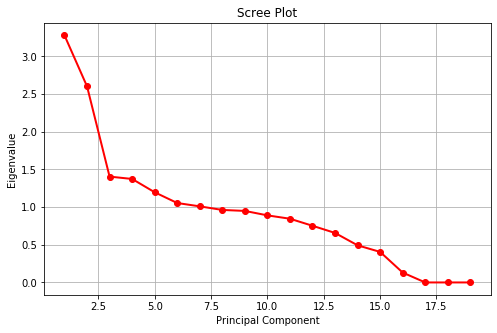

In [38]:
## (9) scree plot
num_vars= len(features)
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1

plt.plot(sing_vals, eigval, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(); plt.show()


In [39]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.82119573e-01, 1.44518085e-01, 7.80064000e-02, 7.62800423e-02,
       6.64746711e-02, 5.85418912e-02, 5.60816115e-02, 5.34449801e-02,
       5.27192039e-02, 4.94369571e-02, 4.69646858e-02, 4.17744426e-02,
       3.64905253e-02, 2.73609228e-02, 2.25034636e-02, 7.28254447e-03,
       6.66481184e-32, 2.29822515e-32, 0.00000000e+00])

<h3>Save all PCA and LDA Results to excel file<h3>

In [40]:
#*******************************************************************************
#                         Save data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('PCA_Loadings_output_SL.xlsx', engine='xlsxwriter')

pca_eigenVal_var.to_excel(writer, sheet_name='pca_eigenVal_var')
Loadings.to_excel(writer, sheet_name='Loadings')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [41]:
#*******************************************************************************
#                         Save data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('PCA_EigenVectors_output_SL.xlsx', engine='xlsxwriter')

EigenVectors.to_excel(writer, sheet_name='EigenVectors')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [42]:
#*******************************************************************************
#                         Save data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('PCA_Data_output_SL.xlsx', engine='xlsxwriter')

X_train_PCA.to_excel(writer, sheet_name='PCA Data', index = False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()